In [1]:
import pandas as pd 

In [9]:
df= pd.read_csv('Diwali Sales Data.csv' , encoding='ISO-8859-1')
'''following was the error that showed coz of encoding problems'''
'''The UnicodeDecodeError you're encountering indicates that there is a problem with the file encoding. Specifically, the CSV file contains characters that cannot be decoded using the default UTF-8 encoding. This is a common issue when the file was saved in a different encoding format (e.g., ISO-8859-1, Windows-1252).'''

"The UnicodeDecodeError you're encountering indicates that there is a problem with the file encoding. Specifically, the CSV file contains characters that cannot be decoded using the default UTF-8 encoding. This is a common issue when the file was saved in a different encoding format (e.g., ISO-8859-1, Windows-1252)."

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [11]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [13]:
df.shape

(11251, 15)

In [14]:
df.drop(columns=['Status', 'unnamed1'], axis=1, inplace=True)

In [15]:
df.dropna(inplace=True)

In [16]:
 df['Amount']=df['Amount'].astype('int')

In [17]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

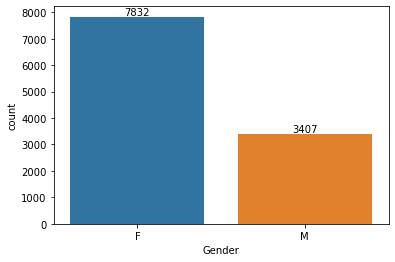

In [24]:
ax=sns.countplot(x='Gender', data=df)
for bar in ax.containers:
    ax.bar_label(bar)

In [42]:
gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by=['Amount'], ascending=False)
#as_index is a new argument here thats the new thing we found

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

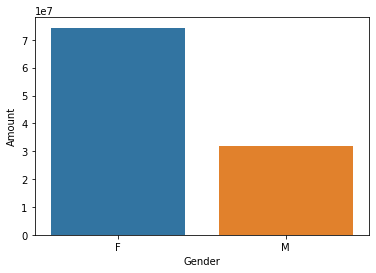

In [39]:
sns.barplot(x='Gender', y='Amount', data=gen)

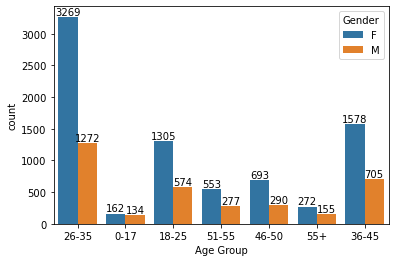

In [41]:
ax=sns.countplot(data=df, x='Age Group', hue='Gender')
for bar in ax.containers:
    ax.bar_label(bar)

In [45]:
s_age= df.groupby(['Age Group', 'Gender'], as_index=False)['Amount'].sum()
s_age

,Age Group,Gender,Amount
0,0-17,F,1441409
1,0-17,M,1258244
2,18-25,F,11887003
3,18-25,M,5353729
4,26-35,F,30963953
5,26-35,M,11649489
6,36-45,F,15509956
7,36-45,M,6635038
8,46-50,F,6743393
9,46-50,M,2464451


<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

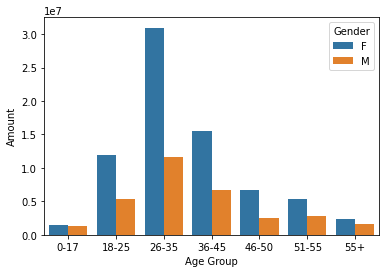

In [50]:
sns.barplot(x='Age Group', y='Amount', data=s_age, hue='Gender')

In [52]:
s_state=df.groupby('State', as_index=False)['Orders'].sum()
s_state

,State,Orders
0,Andhra Pradesh,2051
1,Bihar,1062
2,Delhi,2740
3,Gujarat,1066
4,Haryana,1109
5,Himachal Pradesh,1568
6,Jharkhand,953
7,Karnataka,3240
8,Kerala,1137
9,Madhya Pradesh,2252


<AxesSubplot:xlabel='State', ylabel='Orders'>

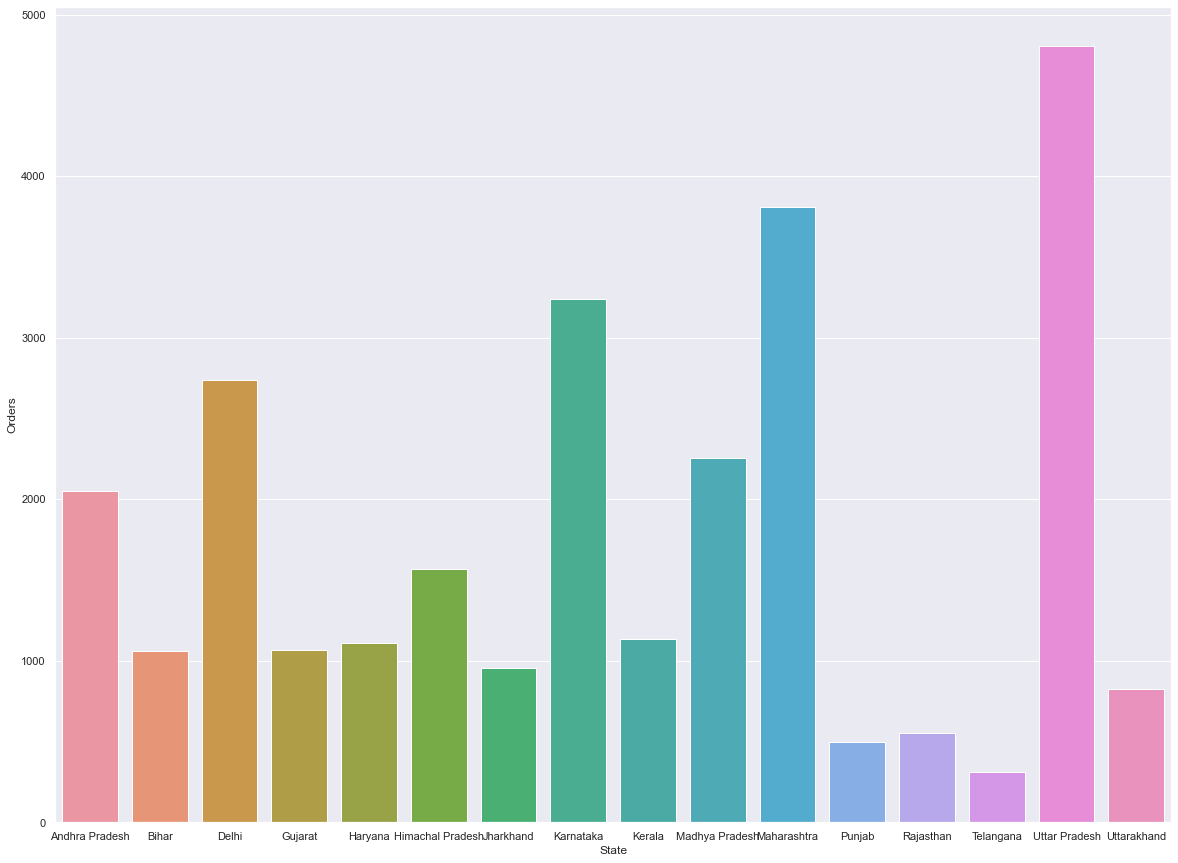

In [57]:
sns.set(rc={'figure.figsize':(20, 15)})
sns.barplot(data=s_state, x='State', y='Orders')

In [59]:
s_state=df.groupby('State', as_index=False)['Amount'].sum()
s_state

,State,Amount
0,Andhra Pradesh,8037146
1,Bihar,4022757
2,Delhi,11603818
3,Gujarat,3946082
4,Haryana,4220175
5,Himachal Pradesh,4963368
6,Jharkhand,3026456
7,Karnataka,13523540
8,Kerala,3894491
9,Madhya Pradesh,8101142


<AxesSubplot:xlabel='State', ylabel='Amount'>

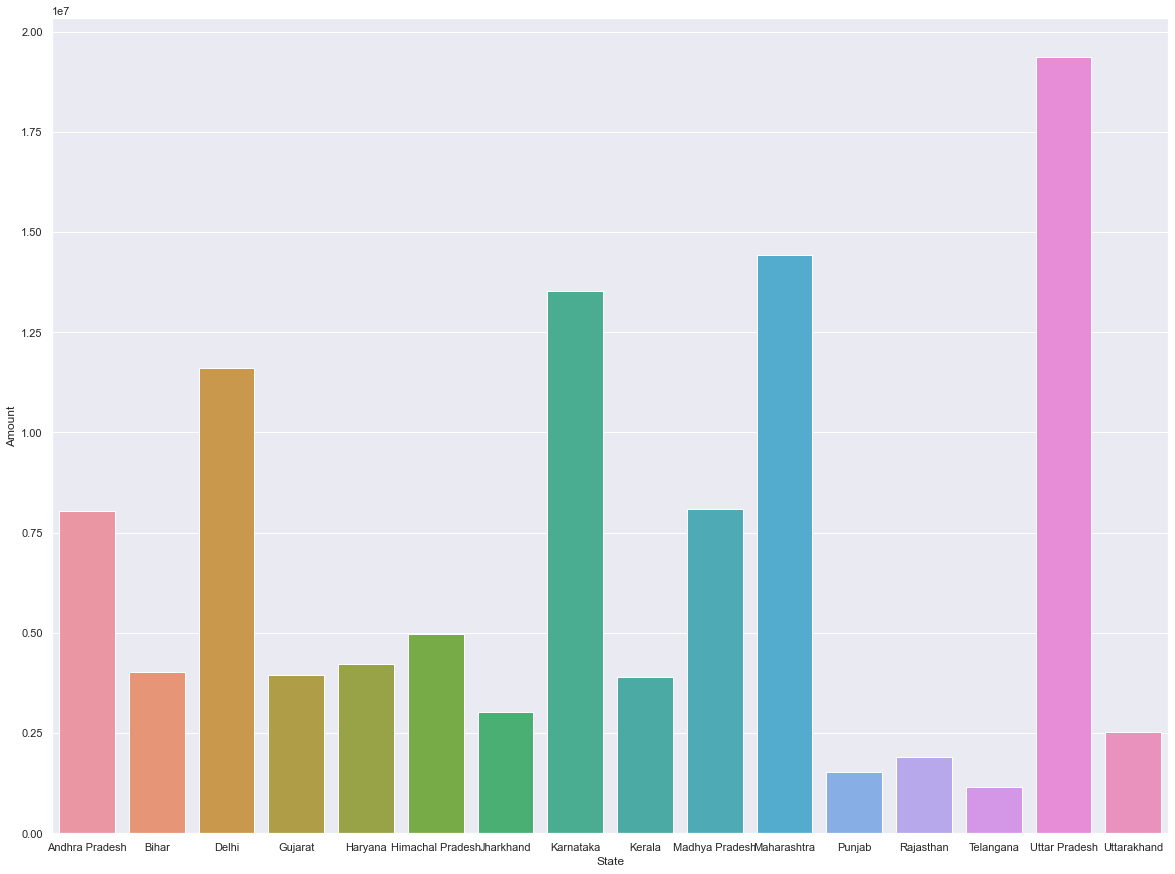

In [60]:
sns.set(rc={'figure.figsize':(20, 15)})
sns.barplot(data=s_state, x='State', y='Amount')

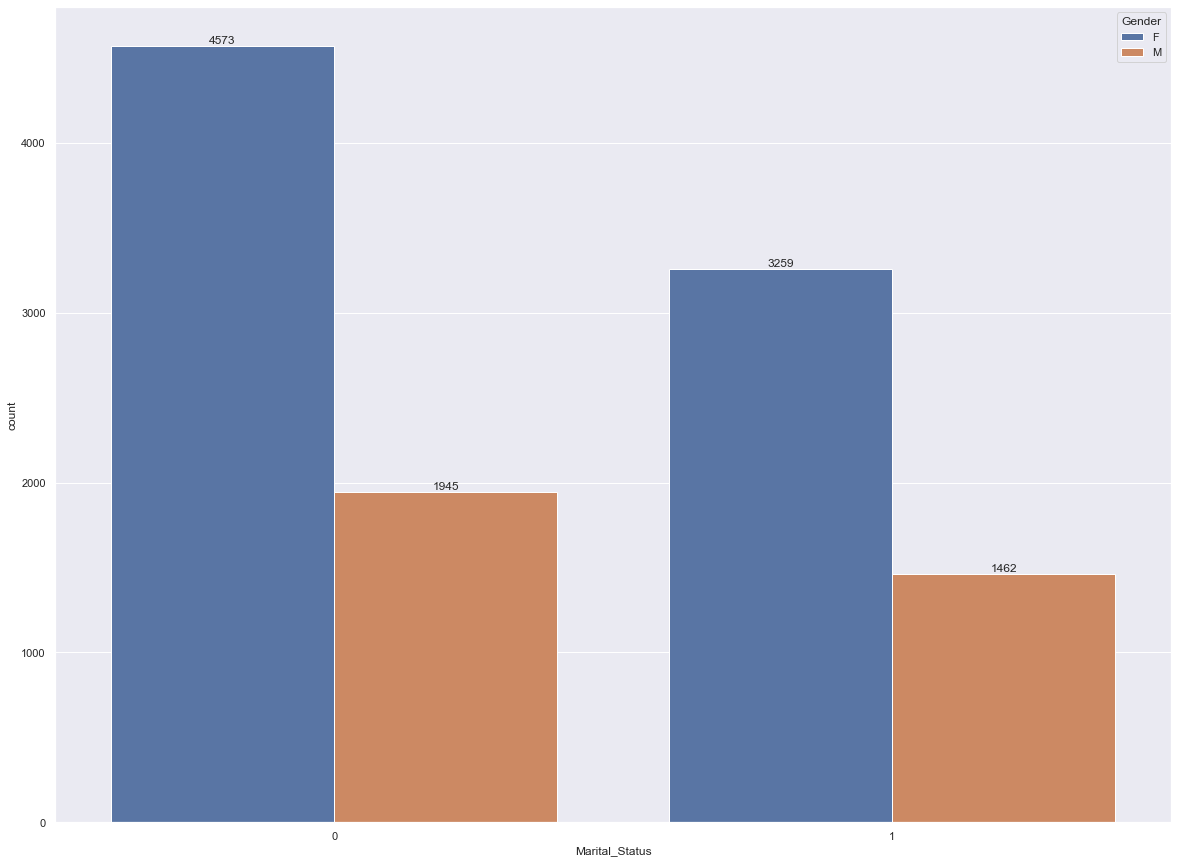

In [62]:
ax=sns.countplot(data=df, x='Marital_Status', hue='Gender')
for bar in ax.containers:
    ax.bar_label(bar)

In [64]:
s_status=df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum()
s_status

,Marital_Status,Gender,Amount
0,0,F,43786646
1,0,M,18338738
2,1,F,30549207
3,1,M,13574538


<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

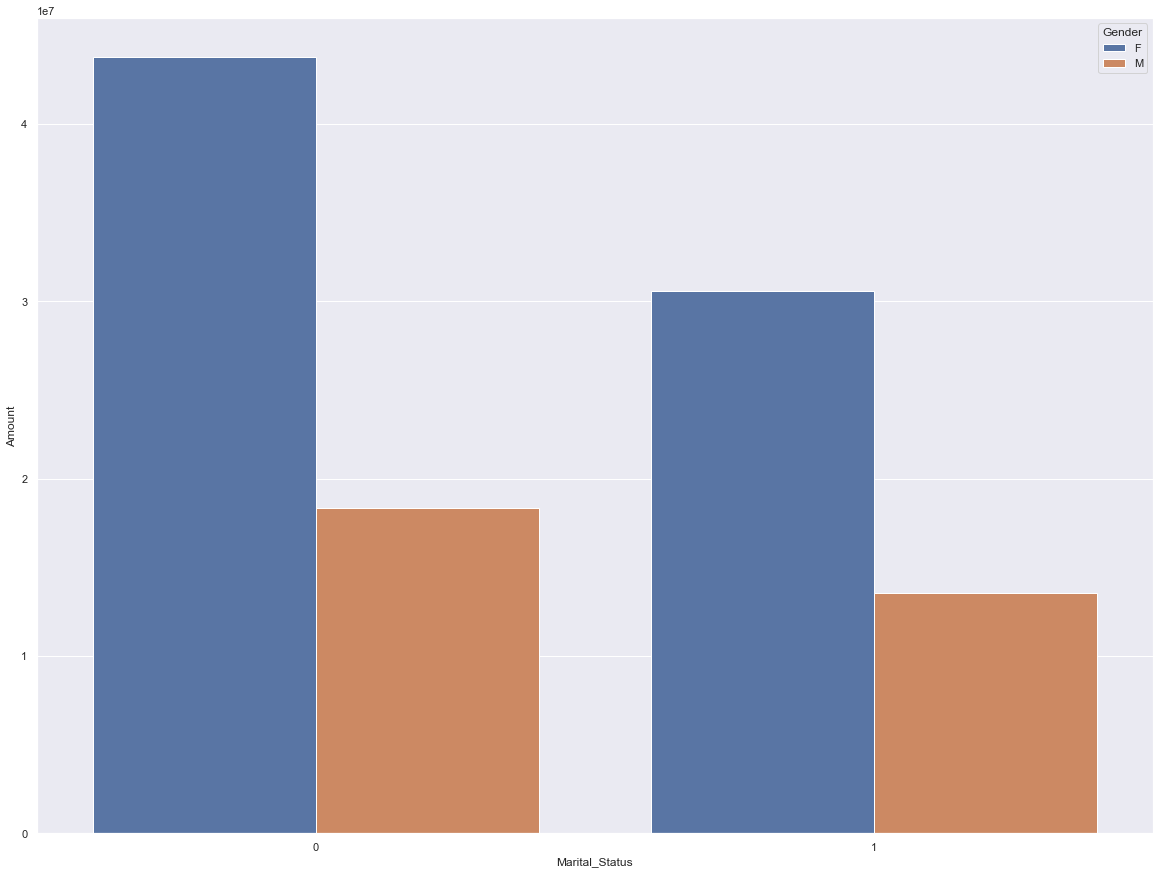

In [65]:
sns.set(rc={'figure.figsize':(20, 15)})
sns.barplot(data=s_status, x='Marital_Status', y='Amount', hue='Gender')

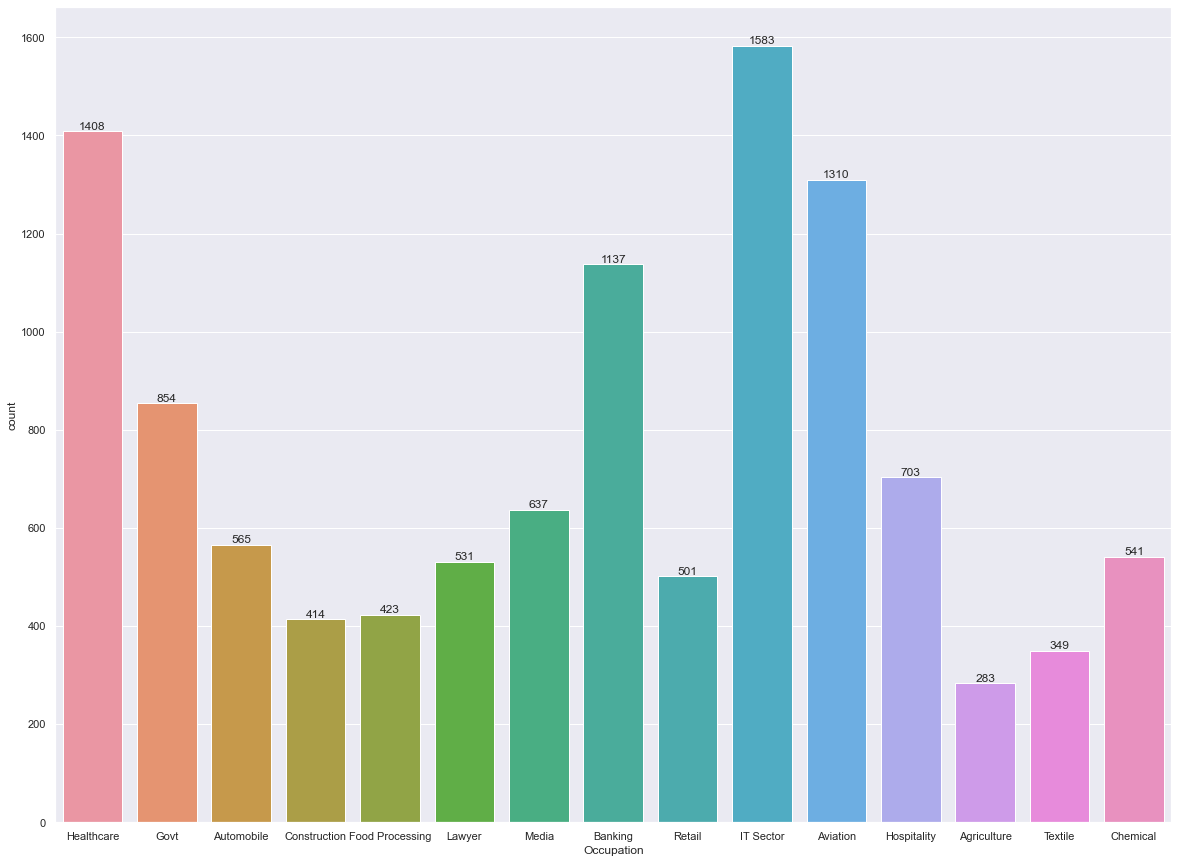

In [66]:
ax=sns.countplot(data=df, x='Occupation')
for bar in ax.containers:
    ax.bar_label(bar)

In [68]:
s_occupation=df.groupby(['Occupation'], as_index=False)['Amount'].sum()
s_occupation

,Occupation,Amount
0,Agriculture,2593087
1,Automobile,5368596
2,Aviation,12602298
3,Banking,10770610
4,Chemical,5297436
5,Construction,3597511
6,Food Processing,4070670
7,Govt,8517212
8,Healthcare,13034586
9,Hospitality,6376405


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

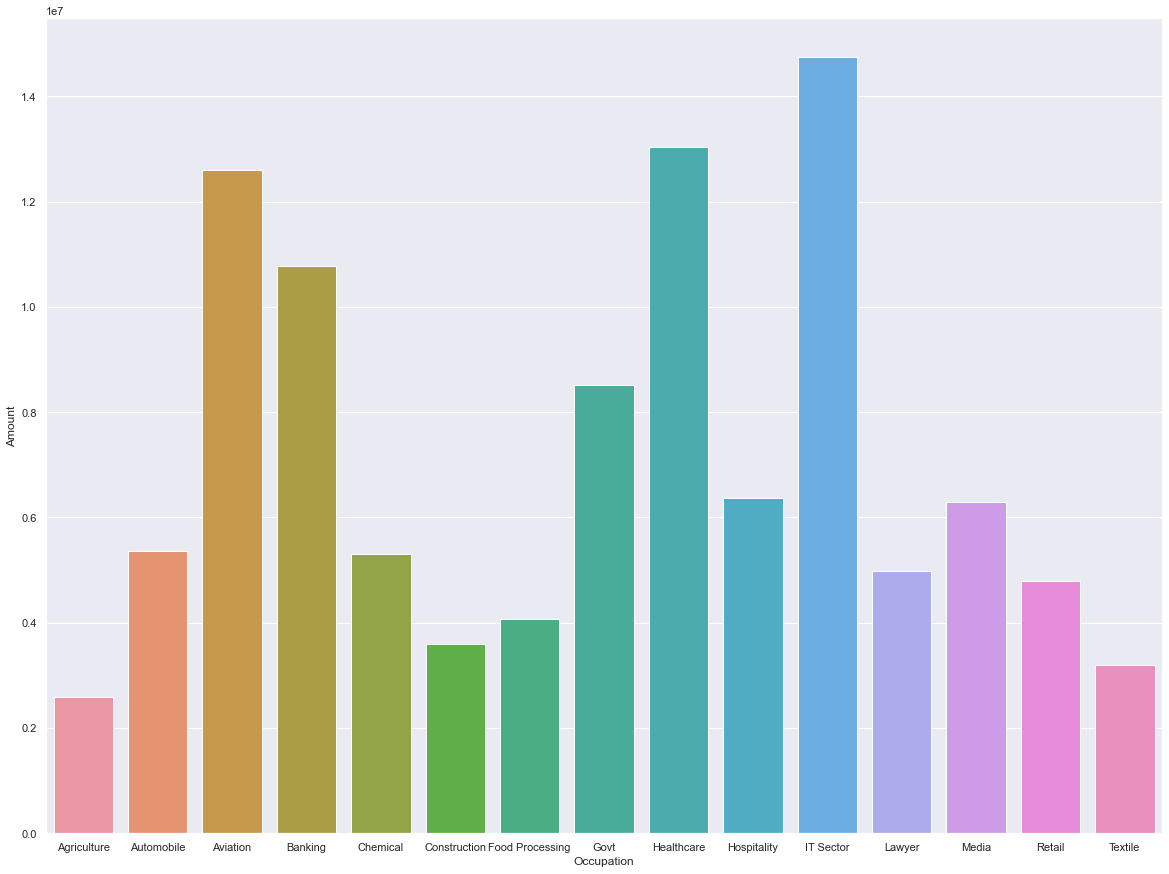

In [69]:
sns.set(rc={'figure.figsize':(20, 15)})
sns.barplot(data=s_occupation, x='Occupation', y='Amount')

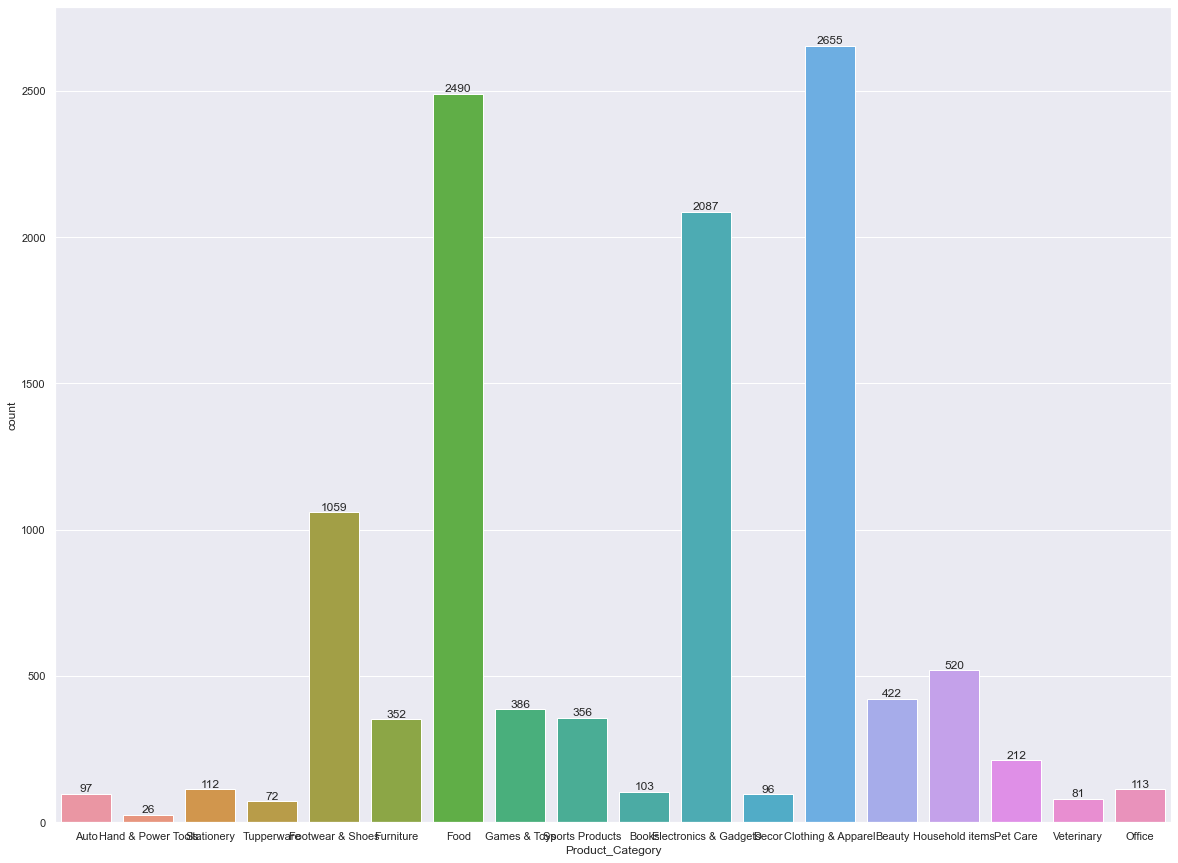

In [70]:
ax=sns.countplot(data=df, x='Product_Category')
for bar in ax.containers:
    ax.bar_label(bar)

<AxesSubplot:xlabel='Product_Category', ylabel='Orders'>

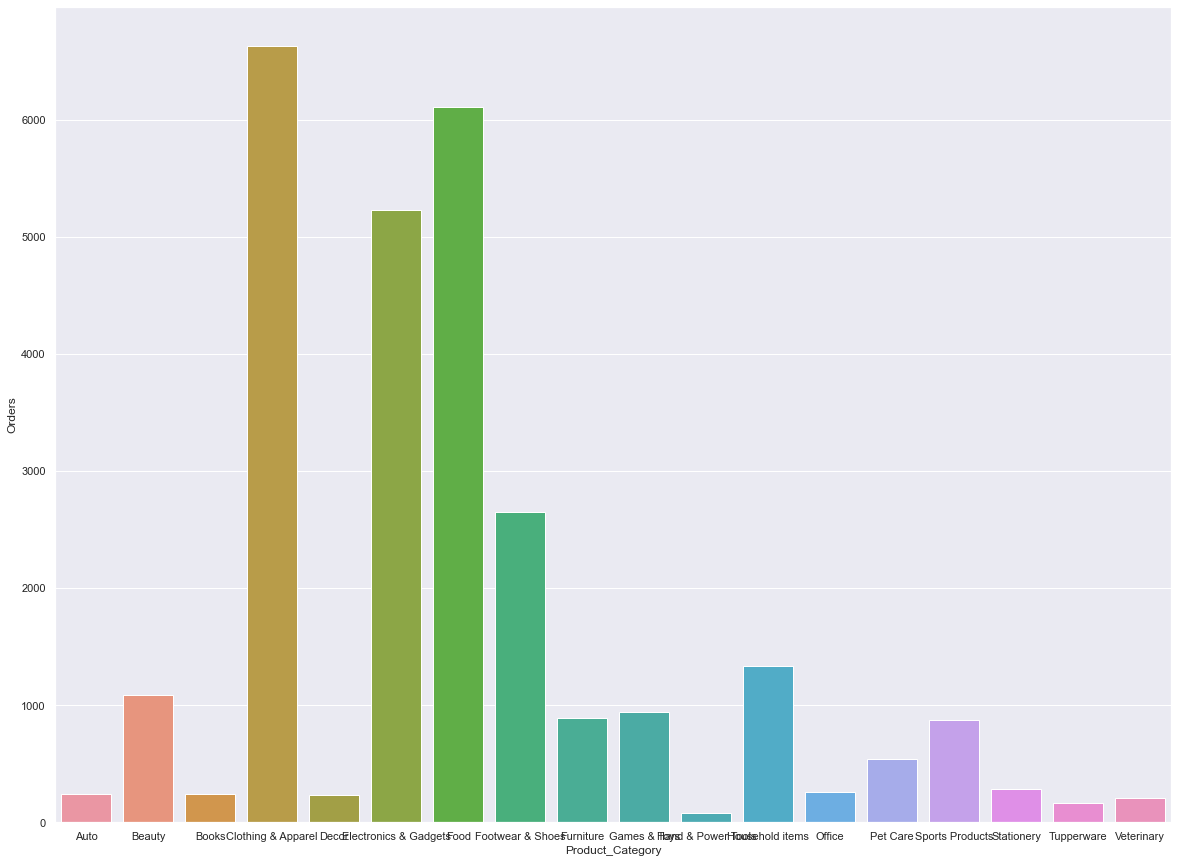

In [74]:
s_pro=df.groupby(['Product_Category'], as_index=False)['Orders'].sum()
sns.set(rc={'figure.figsize':(20, 15)})
sns.barplot(data=s_pro, x='Product_Category', y='Orders')

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

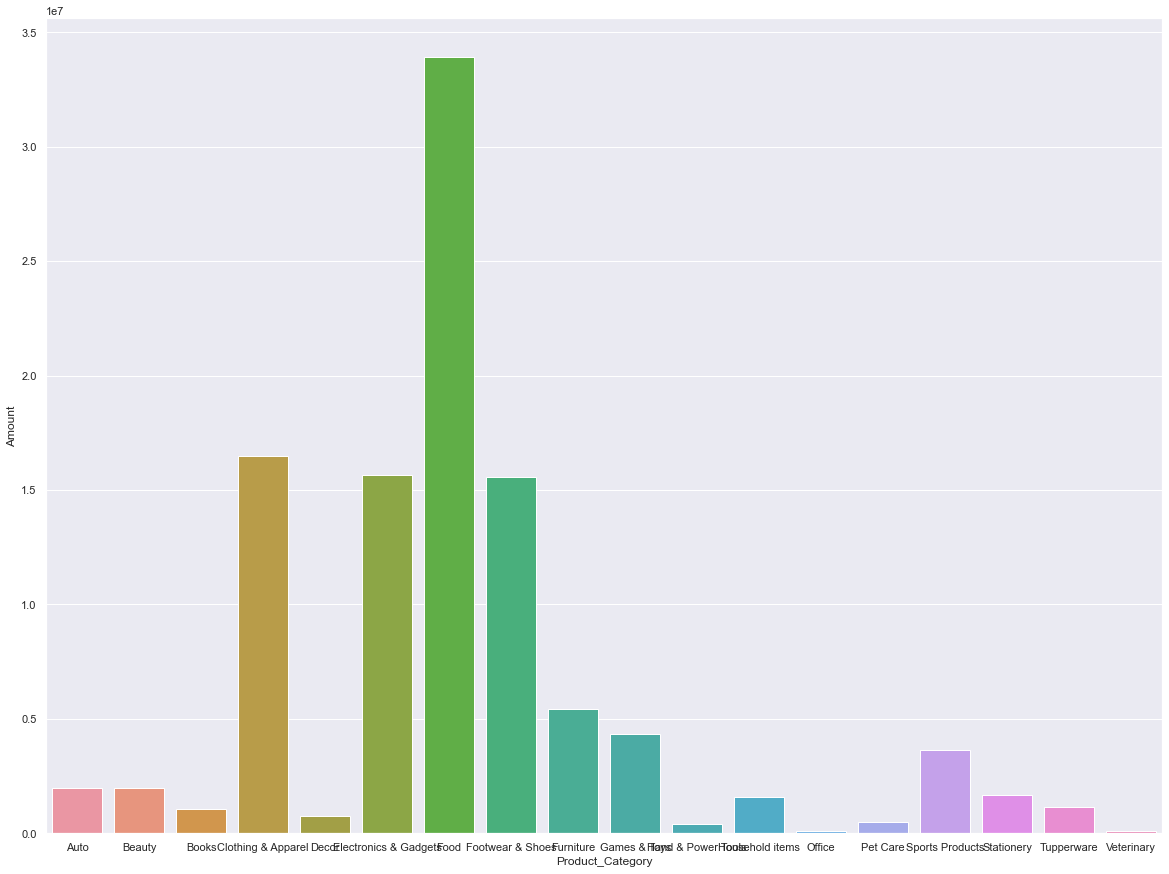

In [75]:
s_pro=df.groupby(['Product_Category'], as_index=False)['Amount'].sum()
sns.set(rc={'figure.figsize':(20, 15)})
sns.barplot(data=s_pro, x='Product_Category', y='Amount')

In [77]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

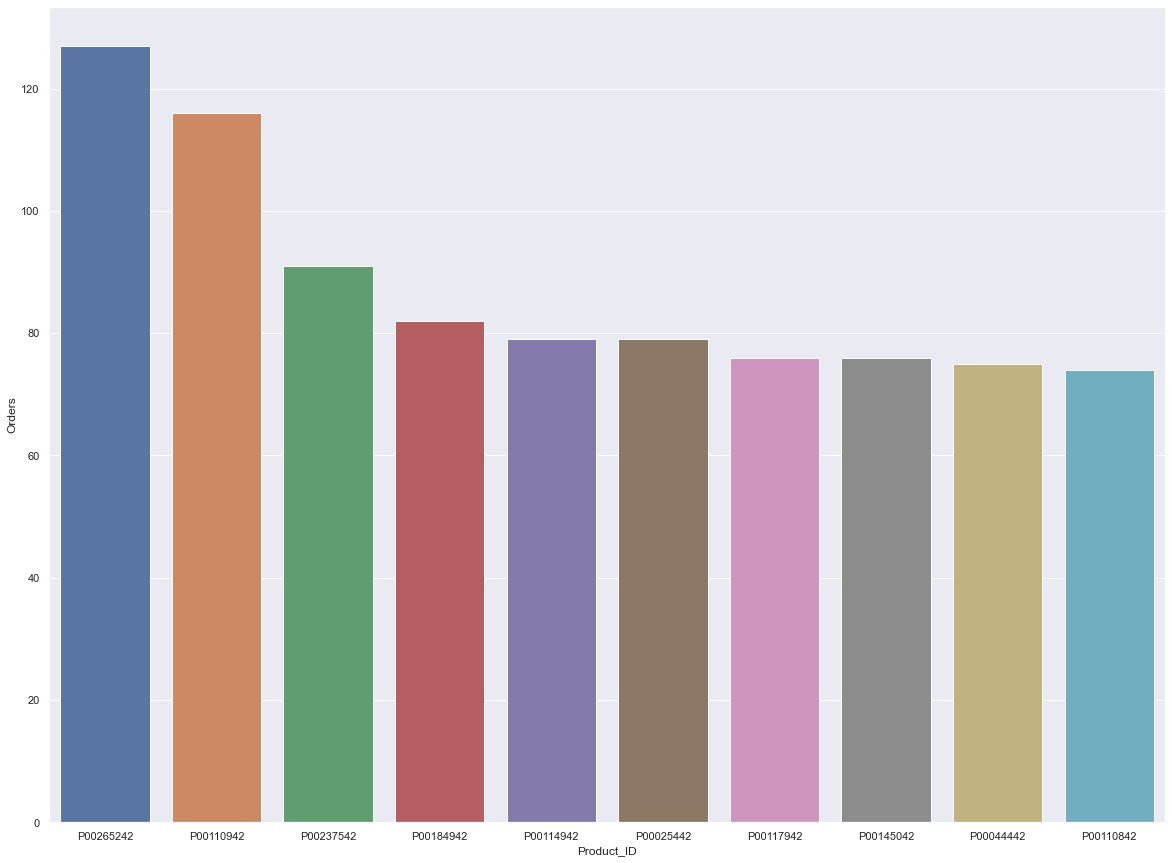

In [79]:
s_pro=df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20, 15)})
sns.barplot(data=s_pro, x='Product_ID', y='Orders')

<AxesSubplot:>

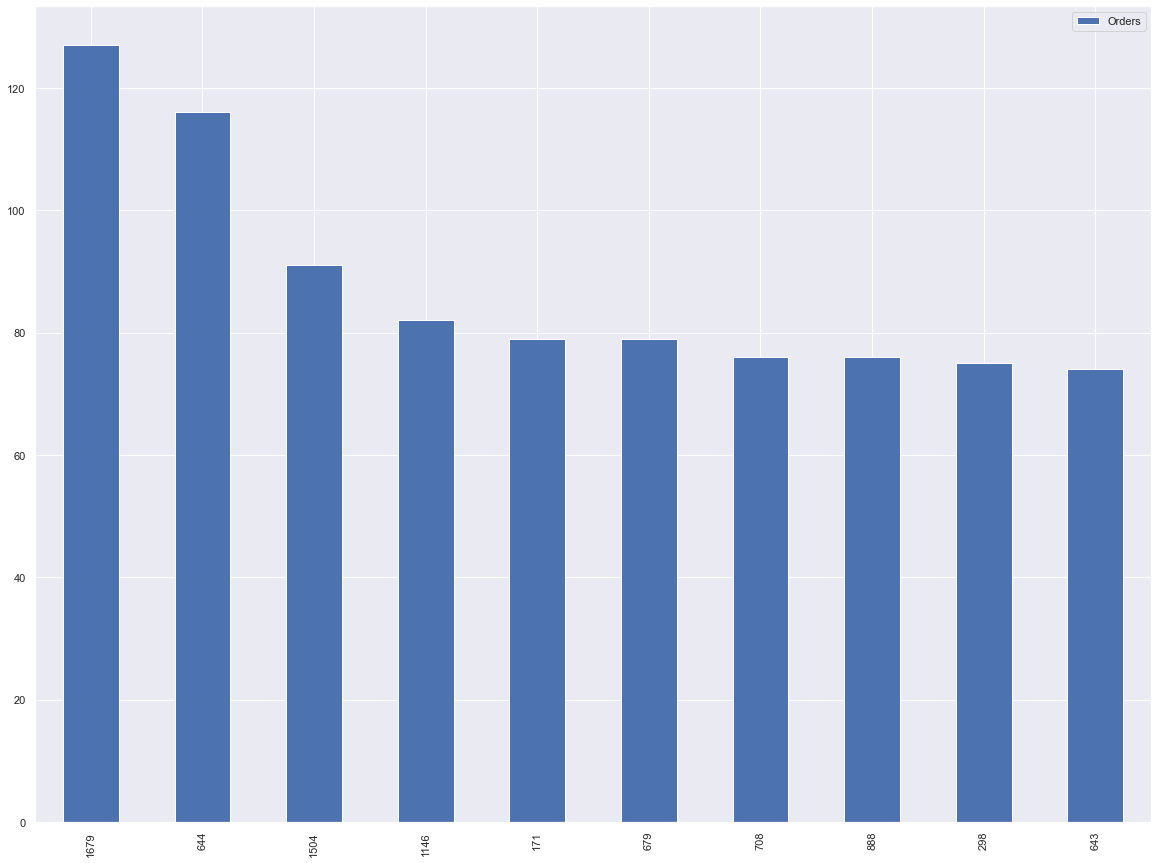

In [81]:
df.groupby(['Product_ID'], as_index=False)['Orders'].sum().nlargest(10, 'Orders').sort_values(by='Orders', ascending=False).plot(kind='bar')